<a href="https://colab.research.google.com/github/CHRISTIANDAGATTI/AEyCD---Grupo-9/blob/main/Entregable_Parte_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn import (base, decomposition, feature_extraction, impute,
                     neighbors, preprocessing)
import seaborn as sns
sns.set_context('talk')

In [45]:


# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv('https://raw.githubusercontent.com/CHRISTIANDAGATTI/AEyCD---Grupo-9/106db4a8b03d93a84ee22dcb3e5b0b99ea6ab4c0/melb_data_extended.csv')
melb_df

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,...,airbnb_price_max,airbnb_weekly_price_min,airbnb_weekly_price_median,airbnb_weekly_price_mean,airbnb_weekly_price_max,airbnb_monthly_price_min,airbnb_monthly_price_median,airbnb_monthly_price_mean,airbnb_monthly_price_max,airbnb_zipcode_count
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,NaN,NaN,...,900.0,180.0,380.0,605.152174,3248.0,700.0,1440.0,2187.032258,11011.0,258.0
1,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,NaN,NaN,...,900.0,180.0,380.0,605.152174,3248.0,700.0,1440.0,2187.032258,11011.0,258.0
2,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,142.0,2014.0,...,900.0,180.0,380.0,605.152174,3248.0,700.0,1440.0,2187.032258,11011.0,258.0
3,Abbotsford,2,h,941000.0,2.5,3067.0,1.0,0.0,NaN,NaN,...,900.0,180.0,380.0,605.152174,3248.0,700.0,1440.0,2187.032258,11011.0,258.0
4,Abbotsford,3,h,1876000.0,2.5,3067.0,2.0,0.0,210.0,1910.0,...,900.0,180.0,380.0,605.152174,3248.0,700.0,1440.0,2187.032258,11011.0,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,Watsonia,2,h,650000.0,14.5,3087.0,1.0,1.0,79.0,2006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9499,Werribee,4,h,635000.0,14.7,3030.0,2.0,1.0,172.0,1980.0,...,550.0,250.0,380.0,590.000000,2500.0,900.0,1300.0,2224.600000,9000.0,258.0
9500,Williamstown,3,h,1031000.0,6.8,3016.0,2.0,2.0,133.0,1995.0,...,995.0,550.0,599.5,612.250000,700.0,1990.0,2095.0,2119.750000,2299.0,74.0
9501,Williamstown,3,h,1170000.0,6.8,3016.0,2.0,4.0,NaN,1997.0,...,995.0,550.0,599.5,612.250000,700.0,1990.0,2095.0,2119.750000,2299.0,74.0


In [46]:

melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bathroom',
       'Car', 'BuildingArea', 'YearBuilt', 'zipcode', 'airbnb_price_min',
       'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max',
       'airbnb_weekly_price_min', 'airbnb_weekly_price_median',
       'airbnb_weekly_price_mean', 'airbnb_weekly_price_max',
       'airbnb_monthly_price_min', 'airbnb_monthly_price_median',
       'airbnb_monthly_price_mean', 'airbnb_monthly_price_max',
       'airbnb_zipcode_count'],
      dtype='object')

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


**Solución: 1) Encoding**

Con el fin de poder entrenar un modelo bajo las variables en melb_combined_df, se deben codificar aquellas que sean categóricas. Para ello, se utiliza One-Hot Encoding donde se muestran dos posibles métodos distintos.

Agrupamos las variables categoricas y númericas:

In [8]:
#Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt:
melb= melb_df[['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Bathroom', 'Car', 'airbnb_price_min', 'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max']]

In [9]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9503 entries, 0 to 9502
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Suburb               9503 non-null   object 
 1   Rooms                9503 non-null   int64  
 2   Type                 9503 non-null   object 
 3   Price                9503 non-null   float64
 4   Distance             9503 non-null   float64
 5   Bathroom             9503 non-null   float64
 6   Car                  9470 non-null   float64
 7   airbnb_price_min     8269 non-null   float64
 8   airbnb_price_median  8269 non-null   float64
 9   airbnb_price_mean    8269 non-null   float64
 10  airbnb_price_max     8269 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 816.8+ KB


In [10]:
#Dividimos las variables por categoricas y numericas:
categorical_cols = ['Type', 'Suburb']
numerical_cols = ['Rooms', 'Price', 'Distance', 'Bathroom',
       'Car', 'airbnb_price_min',
       'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max']

In [11]:
#Contamos los valores únicos que contiene cada variable categórica
melb[categorical_cols].nunique()

Type        3
Suburb    116
dtype: int64

In [12]:
# Contamos la existencia de nulos en cada variable categórica
melb[categorical_cols].isna().sum()

Type      0
Suburb    0
dtype: int64

In [13]:
# Contamos la existencia de nulos en cada variable númericas
melb[numerical_cols].isna().sum()

Rooms                     0
Price                     0
Distance                  0
Bathroom                  0
Car                      33
airbnb_price_min       1234
airbnb_price_median    1234
airbnb_price_mean      1234
airbnb_price_max       1234
dtype: int64

**Dict Vectorizer**

In [14]:
feature_cols = categorical_cols + numerical_cols
features = list(melb[feature_cols].T.to_dict().values())

vectorizer = feature_extraction.DictVectorizer()
feature_matrix = vectorizer.fit_transform(features)
feature_matrix

<9503x128 sparse matrix of type '<class 'numpy.float64'>'
	with 104533 stored elements in Compressed Sparse Row format>

In [15]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Bathroom',
 'Car',
 'Distance',
 'Price',
 'Rooms',
 'Suburb=Abbotsford',
 'Suburb=Aberfeldie',
 'Suburb=Airport West',
 'Suburb=Albion',
 'Suburb=Altona',
 'Suburb=Altona North',
 'Suburb=Armadale',
 'Suburb=Ascot Vale',
 'Suburb=Ashburton',
 'Suburb=Ashwood',
 'Suburb=Avondale Heights',
 'Suburb=Balwyn',
 'Suburb=Balwyn North',
 'Suburb=Bentleigh',
 'Suburb=Bentleigh East',
 'Suburb=Box Hill',
 'Suburb=Braybrook',
 'Suburb=Brighton',
 'Suburb=Brighton East',
 'Suburb=Brunswick',
 'Suburb=Brunswick East',
 'Suburb=Brunswick West',
 'Suburb=Bulleen',
 'Suburb=Bundoora',
 'Suburb=Burwood',
 'Suburb=Camberwell',
 'Suburb=Canterbury',
 'Suburb=Carlton',
 'Suburb=Carlton North',
 'Suburb=Carnegie',
 'Suburb=Caulfield South',
 'Suburb=Chadstone',
 'Suburb=Cheltenham',
 'Suburb=Clifton Hill',
 'Suburb=Coburg',
 'Suburb=Coburg North',
 'Suburb=Collingwood',
 'Suburb=Craigieburn',
 'Suburb=Croydon',
 'Suburb=Doncaster',
 'Suburb=Doncaster East',
 'Suburb=Elsternwick',
 'Suburb=Elwood',
 'Sub

Se obtiene una matriz de 9503x139 cuyas columnas son las que se muestran por get_feature_names().

**Codificación One-hot encoding**

In [48]:
# OPCIÓN 1
#De esta forma obtenemos la matriz de features por medio de OneHotEncoder realizando la codificación sobre categorical_cols:
encoder = preprocessing.OneHotEncoder(sparse=False)
matrix_encoder = np.hstack([encoder.fit_transform(melb[categorical_cols]),
    melb[numerical_cols]
])
matrix_encoder.shape

(9503, 128)

Obviamente podemos verificar que alcanzamos el mismo tamaño de matriz por este metodo (9503x139).

In [51]:
# OPCIÓN 2
#De esta manera codificamos la variable categorica Type y la incluimos en el data frame original
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer((OneHotEncoder(),['Type']), remainder='passthrough')

transformed = transformer.fit_transform(melb)
transformed_df = pandas.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df

,onehotencoder__Type_h,onehotencoder__Type_t,onehotencoder__Type_u,remainder__Suburb,remainder__Rooms,remainder__Price,remainder__Distance,remainder__Bathroom,remainder__Car,remainder__airbnb_price_min,remainder__airbnb_price_median,remainder__airbnb_price_mean,remainder__airbnb_price_max
0,1.0,0.0,0.0,Abbotsford,2,1480000.0,2.5,1.0,1.0,28.0,100.0,130.624031,900.0
1,1.0,0.0,0.0,Abbotsford,3,850000.0,2.5,2.0,1.0,28.0,100.0,130.624031,900.0
2,1.0,0.0,0.0,Abbotsford,4,1600000.0,2.5,1.0,2.0,28.0,100.0,130.624031,900.0
3,1.0,0.0,0.0,Abbotsford,2,941000.0,2.5,1.0,0.0,28.0,100.0,130.624031,900.0
4,1.0,0.0,0.0,Abbotsford,3,1876000.0,2.5,2.0,0.0,28.0,100.0,130.624031,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,1.0,0.0,0.0,Watsonia,2,650000.0,14.5,1.0,1.0,NaN,NaN,NaN,NaN
9499,1.0,0.0,0.0,Werribee,4,635000.0,14.7,2.0,1.0,26.0,68.0,115.748062,550.0
9500,1.0,0.0,0.0,Williamstown,3,1031000.0,6.8,2.0,2.0,60.0,180.0,191.094595,995.0
9501,1.0,0.0,0.0,Williamstown,3,1170000.0,6.8,2.0,4.0,60.0,180.0,191.094595,995.0


In [18]:
#OPCIÓN 3
from sklearn import preprocessing
!pip install category_encoders
from category_encoders import one_hot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.0 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
#El parámetro "use_cat_names = True" permite que se incluyan los nombres de columna 
ohe = one_hot.OneHotEncoder(use_cat_names = True)
df_ohe = ohe.fit_transform(melb[categorical_cols])
df_ohe

,Type_h,Type_u,Type_t,Suburb_Abbotsford,Suburb_Airport West,Suburb_Altona,Suburb_Altona North,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,...,Suburb_Doncaster East,Suburb_Epping,Suburb_Greensborough,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Sunbury,Suburb_Werribee,Suburb_Glen Waverley,Suburb_Hoppers Crossing
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9499,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9500,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9501,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Eliminamos las variables que fueron codificadas del dataset
melb_drop = melb.drop(columns=['Suburb', 'Type'])

In [21]:
# Unimos el dataframe original sin las columnas categoricas con el transformado por OneHOtEncoding
df_encoder = pandas.concat([melb_drop,df_ohe], axis = 1)
df_encoder

,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,airbnb_price_max,Type_h,...,Suburb_Doncaster East,Suburb_Epping,Suburb_Greensborough,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Sunbury,Suburb_Werribee,Suburb_Glen Waverley,Suburb_Hoppers Crossing
0,2,1480000.0,2.5,1.0,1.0,28.0,100.0,130.624031,900.0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,850000.0,2.5,2.0,1.0,28.0,100.0,130.624031,900.0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1600000.0,2.5,1.0,2.0,28.0,100.0,130.624031,900.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,941000.0,2.5,1.0,0.0,28.0,100.0,130.624031,900.0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,1876000.0,2.5,2.0,0.0,28.0,100.0,130.624031,900.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,2,650000.0,14.5,1.0,1.0,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
9499,4,635000.0,14.7,2.0,1.0,26.0,68.0,115.748062,550.0,1,...,0,0,0,0,0,0,0,1,0,0
9500,3,1031000.0,6.8,2.0,2.0,60.0,180.0,191.094595,995.0,1,...,0,0,0,0,0,0,0,0,0,0
9501,3,1170000.0,6.8,2.0,4.0,60.0,180.0,191.094595,995.0,1,...,0,0,0,0,0,0,0,0,0,0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

**2) Solución Imputación:**

In [22]:
# Agregamos a la matriz obtenida en el punto anterior las columnas YearBuilt y BuildingArea que habiamos separado.
df_yb = melb_df[['YearBuilt','BuildingArea']]

In [23]:
# Concatenamos el dataframe creado en la linea anterior con el dataframe que contiene las variables categoricas codificadas

df = pandas.concat([df_yb, df_encoder], axis = 1)
df

,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Doncaster East,Suburb_Epping,Suburb_Greensborough,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Sunbury,Suburb_Werribee,Suburb_Glen Waverley,Suburb_Hoppers Crossing
0,NaN,NaN,2,1480000.0,2.5,1.0,1.0,28.0,100.0,130.624031,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,3,850000.0,2.5,2.0,1.0,28.0,100.0,130.624031,...,0,0,0,0,0,0,0,0,0,0
2,2014.0,142.0,4,1600000.0,2.5,1.0,2.0,28.0,100.0,130.624031,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,2,941000.0,2.5,1.0,0.0,28.0,100.0,130.624031,...,0,0,0,0,0,0,0,0,0,0
4,1910.0,210.0,3,1876000.0,2.5,2.0,0.0,28.0,100.0,130.624031,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,2006.0,79.0,2,650000.0,14.5,1.0,1.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9499,1980.0,172.0,4,635000.0,14.7,2.0,1.0,26.0,68.0,115.748062,...,0,0,0,0,0,0,0,1,0,0
9500,1995.0,133.0,3,1031000.0,6.8,2.0,2.0,60.0,180.0,191.094595,...,0,0,0,0,0,0,0,0,0,0
9501,1997.0,NaN,3,1170000.0,6.8,2.0,4.0,60.0,180.0,191.094595,...,0,0,0,0,0,0,0,0,0,0


**Aplicaremos el estimador "Multivariate feature imputation" con los datos originales y posteriormente "KNeighborsRegressor" con los datos estandarizados ya que utiliza distancias en la búqueda de vecinos cercanos de las variables.**

a) Multivariate feature imputation

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

df_imputer = df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())
df_imputer[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(df_imputer[['YearBuilt','BuildingArea']])
df_imputer.head(3)

,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Doncaster East,Suburb_Epping,Suburb_Greensborough,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Sunbury,Suburb_Werribee,Suburb_Glen Waverley,Suburb_Hoppers Crossing
0,1970.36578,137.400887,2,1480000.0,2.5,1.0,1.0,28.0,100.0,130.624031,...,0,0,0,0,0,0,0,0,0,0
1,1970.36578,137.400887,3,850000.0,2.5,2.0,1.0,28.0,100.0,130.624031,...,0,0,0,0,0,0,0,0,0,0
2,2014.00000,142.000000,4,1600000.0,2.5,1.0,2.0,28.0,100.0,130.624031,...,0,0,0,0,0,0,0,0,0,0


Comparamos las distribuciones de datos: Originales e Imputados obtenidas con el método de imputación "Multivariate feature imputation"

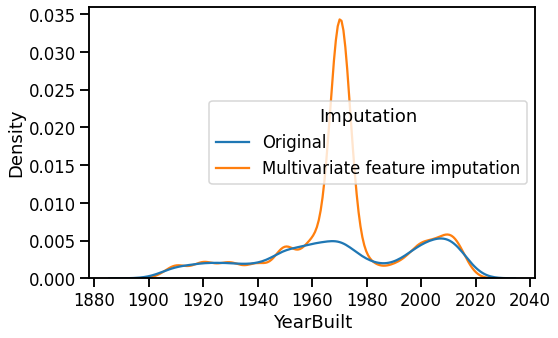

In [27]:
#Variable YearBuilt
df_imp_year_built = df_imputer.YearBuilt.to_frame()
df_imp_year_built['Imputation'] = "Multivariate feature imputation"
df_year_built = df.YearBuilt.dropna().to_frame()
df_year_built['Imputation'] = 'Original'
data = pandas.concat([df_year_built, df_imp_year_built]).reset_index()
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

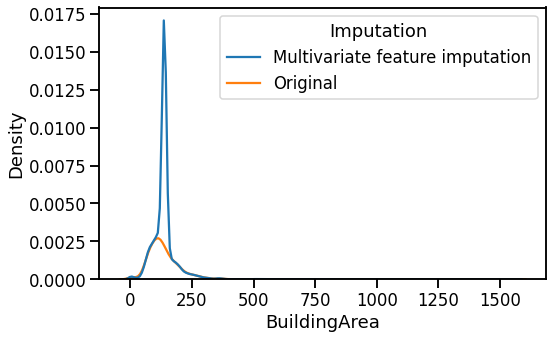

In [28]:
#Variable BuildingArea
df_imp_build = df_imputer.BuildingArea.to_frame()
df_imp_build['Imputation'] = "Multivariate feature imputation"
df_build = df.BuildingArea.dropna().to_frame()
df_build['Imputation'] = 'Original'
data = pandas.concat([df_imp_build, df_build]).reset_index()
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='BuildingArea', hue='Imputation')

b) K-Nearest Neighbor Imputation

In [29]:
columns_names = df.columns.values

df_escaler = df.copy(deep=True)

In [30]:
from sklearn.preprocessing import MinMaxScaler
escala = MinMaxScaler()
escala.fit(df_escaler[columns_names])
df_escaler.loc[:, columns_names] = escala.transform(df_escaler[columns_names])
df_escaler

,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Doncaster East,Suburb_Epping,Suburb_Greensborough,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Sunbury,Suburb_Werribee,Suburb_Glen Waverley,Suburb_Hoppers Crossing
0,NaN,NaN,0.111111,0.593295,0.078864,0.000000,0.1,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,0.222222,0.247046,0.078864,0.142857,0.1,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.965517,0.090967,0.333333,0.659247,0.078864,0.000000,0.2,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,0.111111,0.297060,0.078864,0.000000,0.0,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.068966,0.134529,0.222222,0.810937,0.078864,0.142857,0.0,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,0.896552,0.050609,0.111111,0.137126,0.457413,0.000000,0.1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9499,0.672414,0.110186,0.333333,0.128882,0.463722,0.142857,0.1,0.433333,0.200000,0.210606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9500,0.801724,0.085202,0.222222,0.346524,0.214511,0.142857,0.2,1.000000,1.000000,0.550294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9501,0.818966,NaN,0.222222,0.422918,0.214511,0.142857,0.4,1.000000,1.000000,0.550294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Imputamos las variables 
from sklearn.impute import KNNImputer

df_knn = df_escaler.copy(deep=True)
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_knn[['YearBuilt','BuildingArea']] = knn_imputer.fit_transform(df_knn[['YearBuilt','BuildingArea']])
df_knn.head(4)


,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Doncaster East,Suburb_Epping,Suburb_Greensborough,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Sunbury,Suburb_Werribee,Suburb_Glen Waverley,Suburb_Hoppers Crossing
0,0.589359,0.088021,0.111111,0.593295,0.078864,0.000000,0.1,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.589359,0.088021,0.222222,0.247046,0.078864,0.142857,0.1,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.965517,0.090967,0.333333,0.659247,0.078864,0.000000,0.2,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.589359,0.088021,0.111111,0.297060,0.078864,0.000000,0.0,0.466667,0.428571,0.277672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


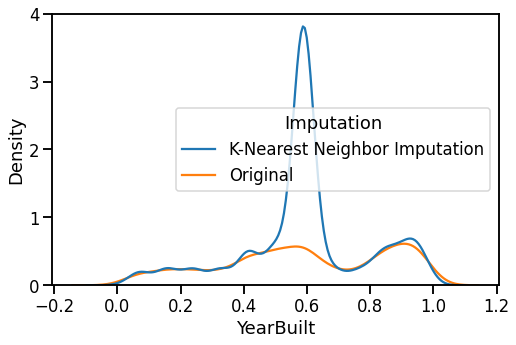

In [34]:
#Variable YearBuilt
df_knn_year = df_knn.YearBuilt.to_frame()
df_knn_year['Imputation'] = "K-Nearest Neighbor Imputation"
df_year = df_escaler.YearBuilt.dropna().to_frame()
df_year['Imputation'] = 'Original'
data = pandas.concat([df_knn_year, df_year]).reset_index()
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

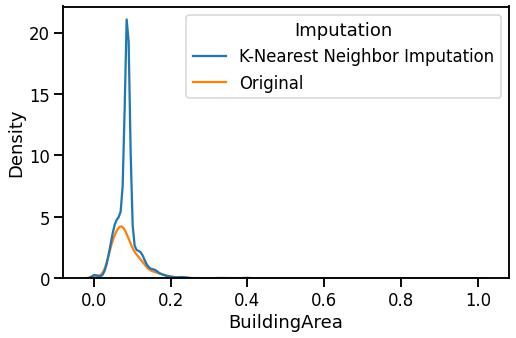

In [36]:
#Variable BuildingArea
df_knn_build = df_knn.BuildingArea.to_frame()
df_knn_build['Imputation'] = "K-Nearest Neighbor Imputation"
df_build2 = df_escaler.BuildingArea.dropna().to_frame()
df_build2['Imputation'] = 'Original'
data = pandas.concat([df_knn_build, df_build2]).reset_index()
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='BuildingArea', hue='Imputation')


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

**3) Solución Reducción de dimensionalidad**

In [37]:
#Controlamos la existencia de valores nulos de las columnas antes de la codificación de las variables categoricas y antes de la imputación de BuildingArea y YearBuilt
df_imputer.isnull().any()

YearBuilt                  False
BuildingArea               False
Rooms                      False
Price                      False
Distance                   False
                           ...  
Suburb_Mount Waverley      False
Suburb_Sunbury             False
Suburb_Werribee            False
Suburb_Glen Waverley       False
Suburb_Hoppers Crossing    False
Length: 130, dtype: bool

In [38]:
# Control de Nan en Dataframe en el que se imputaron las Columnas BuildingArea y YearBuilt (df_imputer.info)

In [39]:
#Imputamos las variables con Nan ya que para aplicar el método de PCA no deben existir en nuestro Dataframe.
df_imputer2 = df_imputer.copy(deep=True)

knn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imputer2[['Car', 'airbnb_price_min','airbnb_price_median','airbnb_price_mean', 'airbnb_price_max']] = knn_imputer.fit_transform(
    df_imputer2[['Car', 'airbnb_price_min','airbnb_price_median','airbnb_price_mean', 'airbnb_price_max']])

In [40]:
#Control de Nan en columnas imputadas
df_imputer2[['Car', 'airbnb_price_min','airbnb_price_median','airbnb_price_mean', 'airbnb_price_max']].isnull().any()

Car                    False
airbnb_price_min       False
airbnb_price_median    False
airbnb_price_mean      False
airbnb_price_max       False
dtype: bool

In [41]:
#Aplicamos el método de PCA para el total de atributos
from sklearn.decomposition import PCA

n_comp=19
pca = PCA(n_comp)
princ_comp = pca.fit(df_imputer2)
var_expl = pca.explained_variance_
prop_var_expl = pca.explained_variance_ratio_

In [43]:
pca.explained_variance_ratio_

array([9.99971717e-01, 2.82536983e-05, 1.54929273e-08, 9.11354177e-09,
       2.78790838e-09, 1.05966020e-09, 4.23548240e-10, 7.91732985e-11,
       4.36602587e-12, 2.65380339e-12, 1.41092643e-12, 9.04693448e-13,
       6.34827113e-13, 1.36048774e-13, 1.30697799e-13, 1.07155164e-13,
       1.03640060e-13, 9.99291443e-14, 9.62934748e-14])

Proporción de Varianza Explicada acumulada para todas las componentes

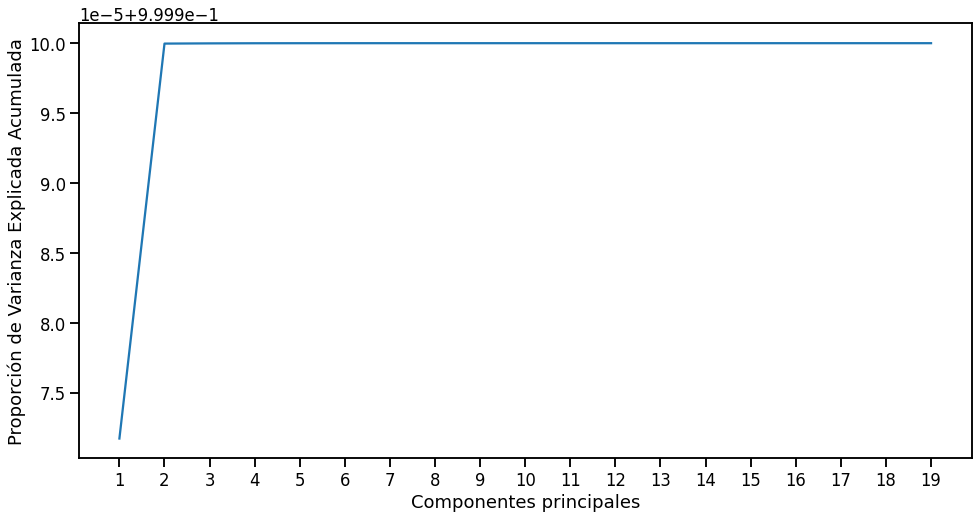

In [42]:
eje_y = np.cumsum(prop_var_expl)
fig,ax = plt.subplots(figsize = [16,8])
ax.plot([str(i) for i in range(1,n_comp+1)], eje_y)
plt.xlabel('Componentes principales')
plt.ylabel("Proporción de Varianza Explicada Acumulada")
plt.show()

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
